In [1]:
%load_ext autoreload
%autoreload 2
import finoptions as fo
import numpy as np

In [24]:
S1 = 122
S2 = 120
K = 3
r = 0.1
b1 = 0
b2 = 0
n = 100
sigma1 = 0.2
sigma2 = 0.2
rho = 0
t = 0.1
otype = "european"

In [25]:
opt = fo.spread_options.BionomialSpreadOption(S1=S1, S2=S2, K=K, r=r, b1=b1, b2=b2, n=n, sigma1=sigma1, sigma2=sigma2, t=t, rho=rho, otype=otype)

In [26]:
opt.call()

3.8007603756020516

In [7]:
opt.put()

(12, 12)


6.4577460586969195

In [143]:
opt = fo.spread_options.TrinomialSpreadOption(S1=S1, S2=S2, K=K, t=t, r=r, b=b1, sigma1=sigma1, sigma2=sigma2, rho=rho, n=50)

In [144]:
c = opt.call()

In [145]:
c

11.690319218861152

In [50]:
import numpy as np

In [65]:
S = 70
sigma = 0.2
K = 65
n=2
u = np.exp(sigma * np.sqrt(1/12))
d = 1/u

In [66]:
u

1.0594342369612506

In [67]:
u ** np.arange(0, n + 1) * d ** np.arange(n, -1, -1)

array([0.89094725, 1.        , 1.1224009 ])

In [68]:
d ** np.arange(n, -1, -1)

array([0.89094725, 0.94390002, 1.        ])

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [40]:

def plot_nine_tree(ax, x,y,z,dt=1, dy=1, dz=1, render="matplotlib"):
    nodes = []
    for hv in [-dz, 0, dz]:
        for hh in [-dy, 0, dy]:
            if render == "matplotlib":
                ax.plot([x,x+dt],[y,y+hh],[z,z+hv], marker="o", color='b')
            else:
                ax.add_trace(go.Scatter3d(x=[x,x+dt],y=[y,y+hh],z=[z,z+hv],mode='markers+lines', marker_color='blue',showlegend=False))
                
            nodes.append((dt,hh,hv))
    return nodes, ax

In [45]:
ax = go.Figure()

nodes, ax = plot_nine_tree(ax,0,0,0, render='plotly',dt=3)
for n in nodes:
    nodes, ax = plot_nine_tree(ax,*n, render='plotly',dt=3)
ax.show()

In [ ]:
1x1 0
3x3 1
5x5 2
7x7 3

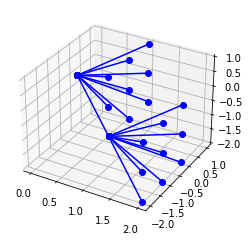

In [46]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nodes, ax = plot_nine_tree(ax,0,0,0)
nodes, ax = plot_nine_tree(ax,*nodes[0])